In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
OKABE_ITO_SCALE = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

%load_ext autoreload
%autoreload 2

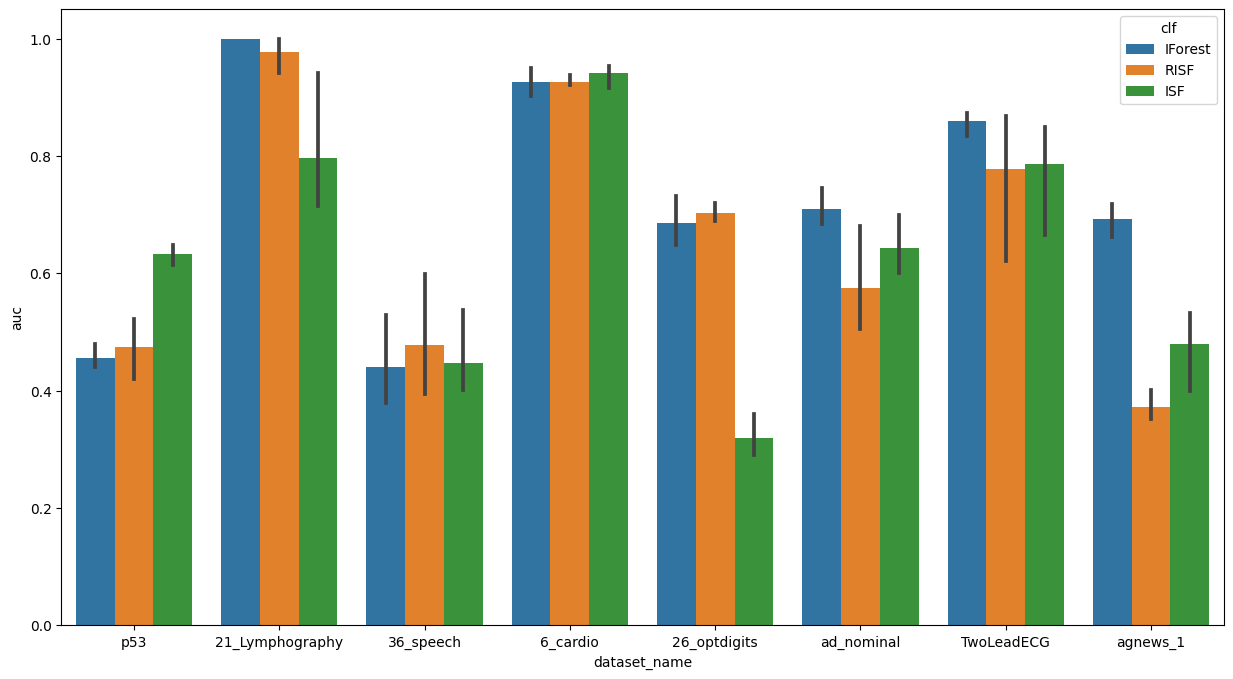

In [2]:
df = pd.read_csv('../results/results_default.csv')
sns.barplot(data=df, x="dataset_name", y="auc", hue="clf")
plt.gcf().set_size_inches(15, 8) # We don't need to check Isolation forest, maybe just for debugging.

In [11]:
def sensitivity_plot(csv_path, parameter_name):
    results = pd.read_csv(csv_path)
    sns.set_palette(sns.color_palette(OKABE_ITO_SCALE))
    g = sns.relplot(data=results, x=parameter_name, y="auc", hue="clf", marker="o", col="dataset_name", col_wrap=4, 
                facet_kws={'sharey': False, 'sharex': False}, kind="line")
    g.set(ylim=(0, 1))
    g.fig.suptitle(f'influence of {parameter_name} on AUC')
    plt.gcf().set_size_inches(20, 10)

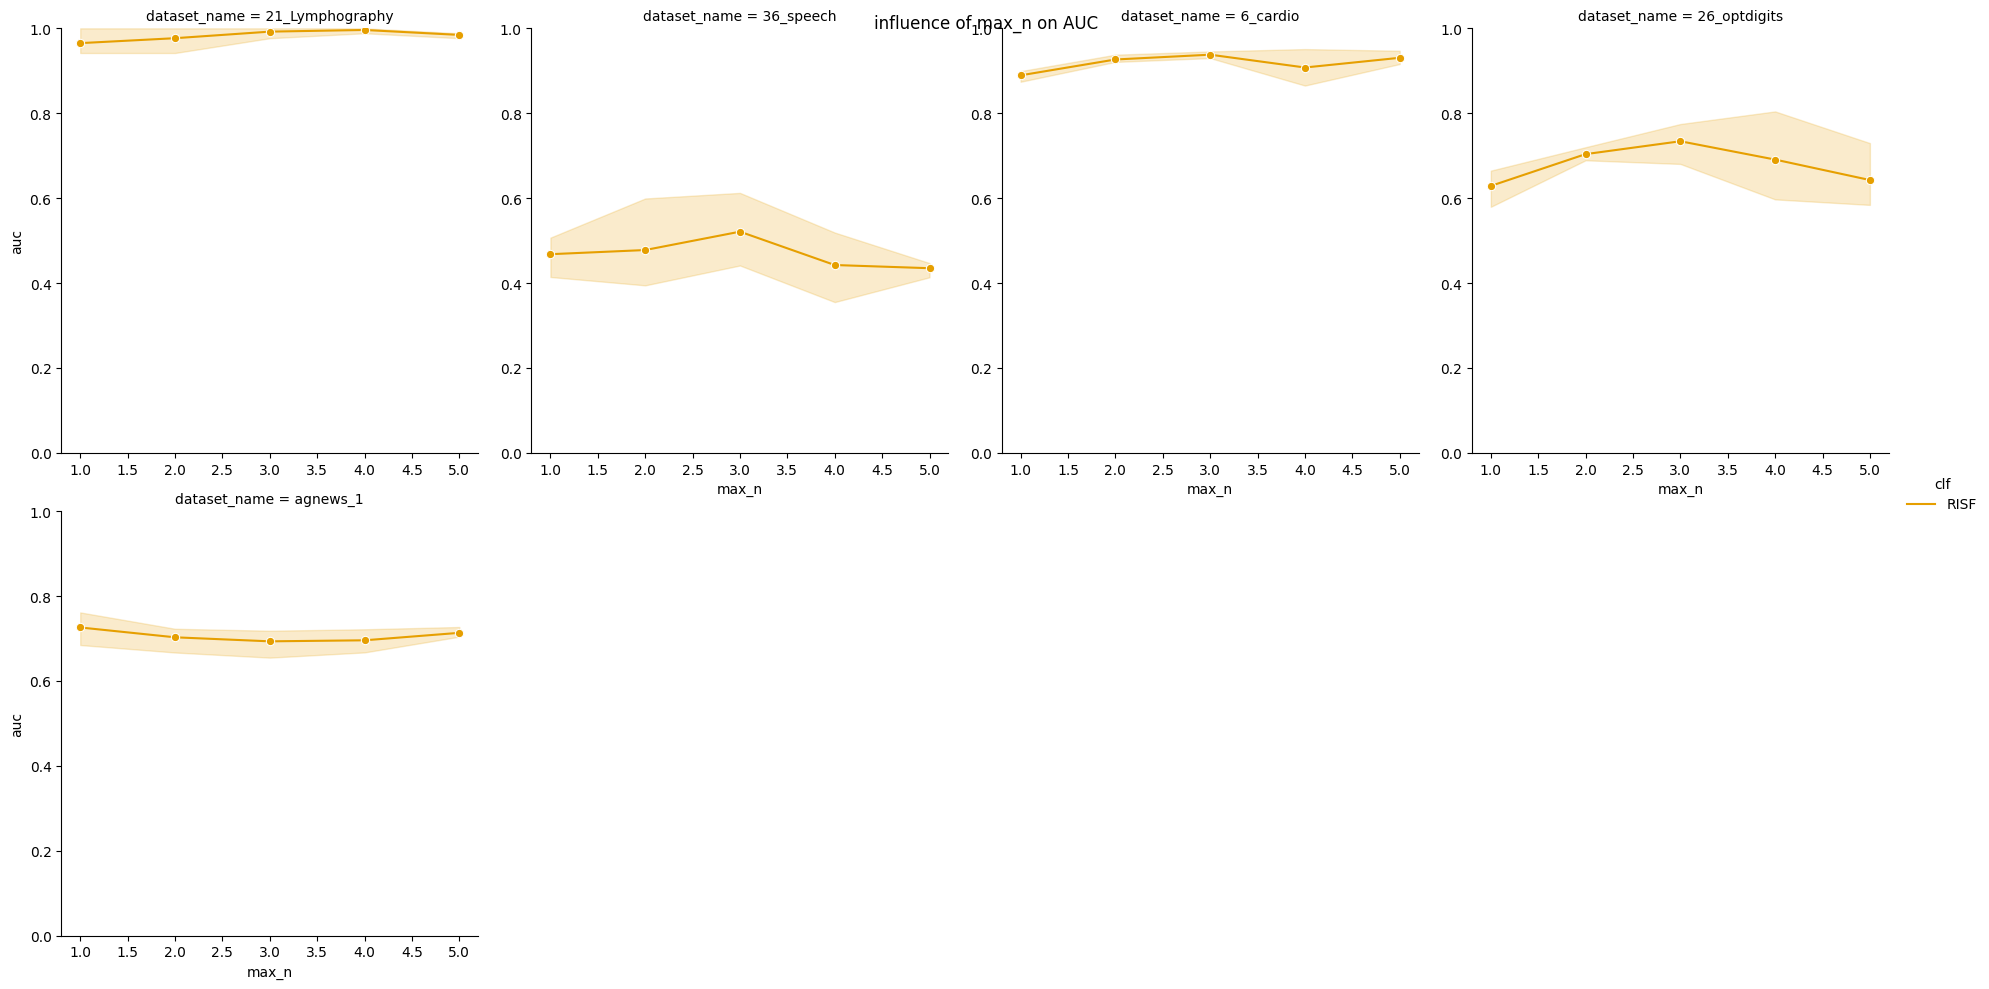

In [19]:
sensitivity_plot("../results/results_max_n.csv", "max_n")

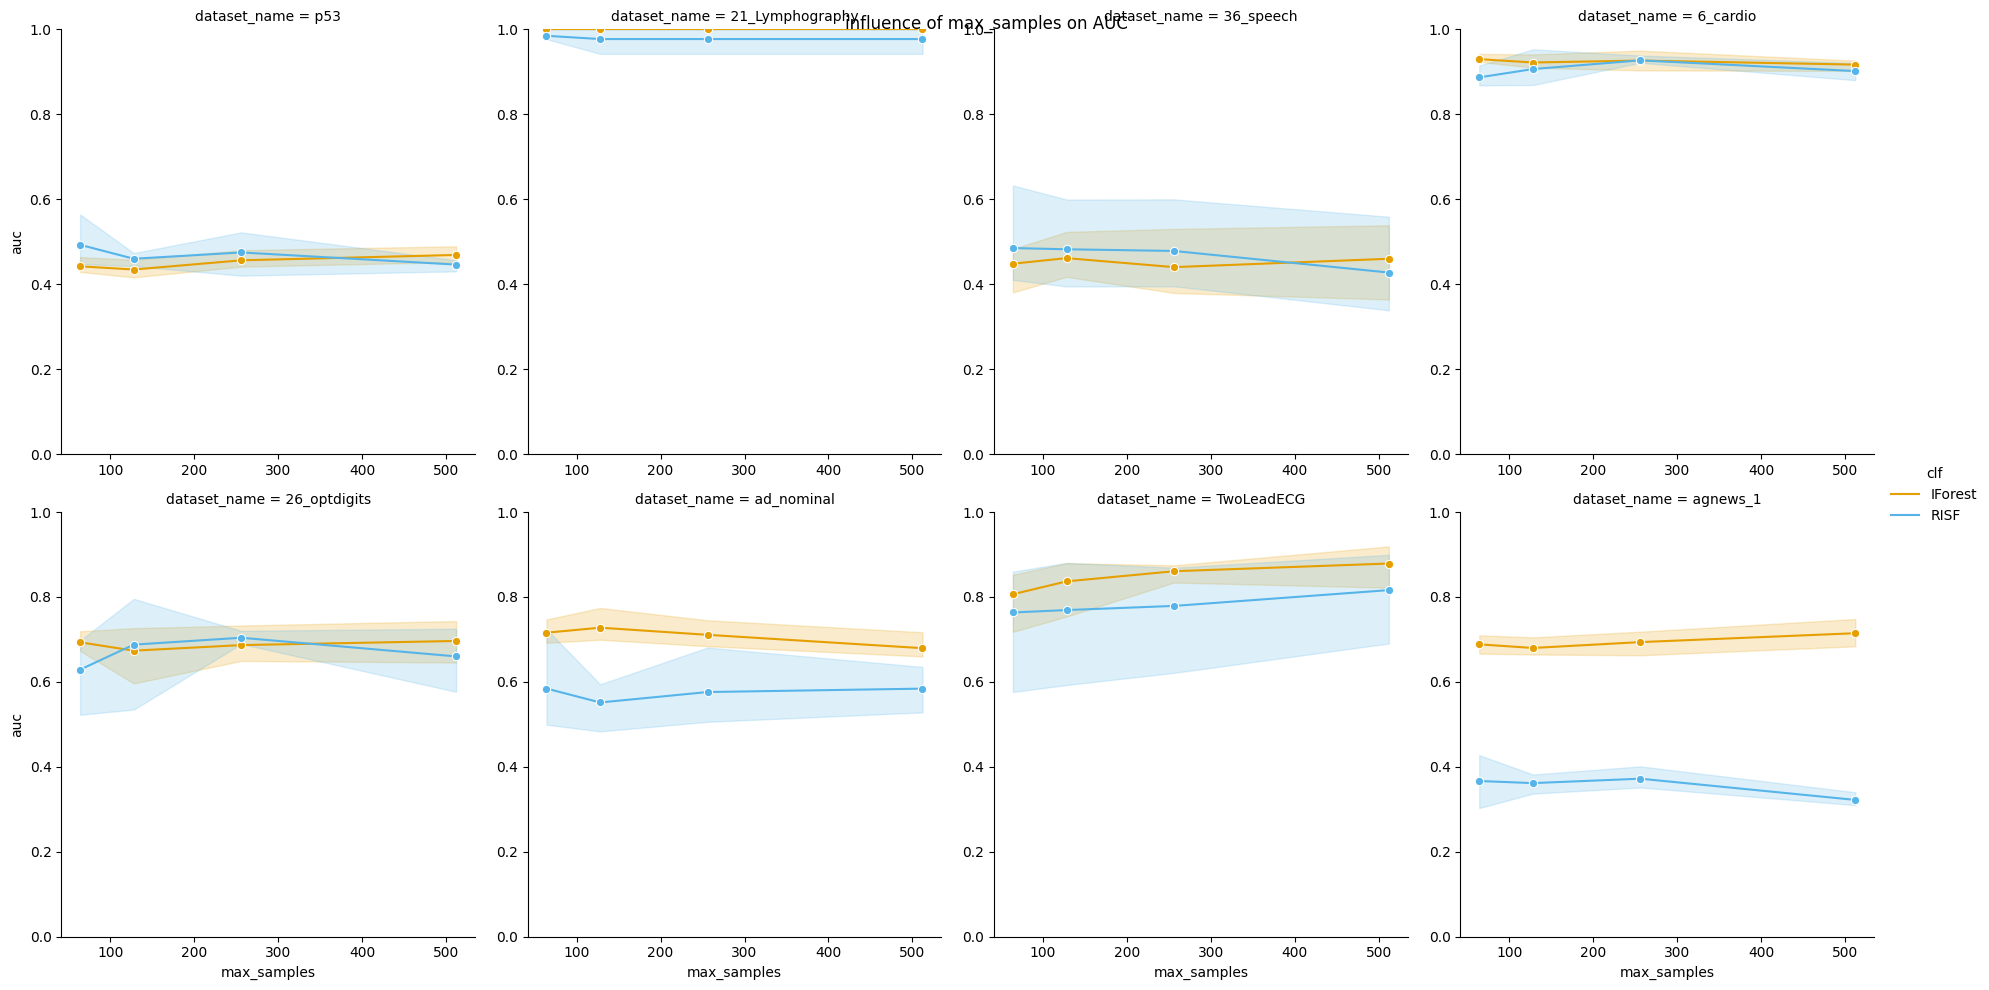

In [13]:
sensitivity_plot("../results/results_max_samples.csv", "max_samples")

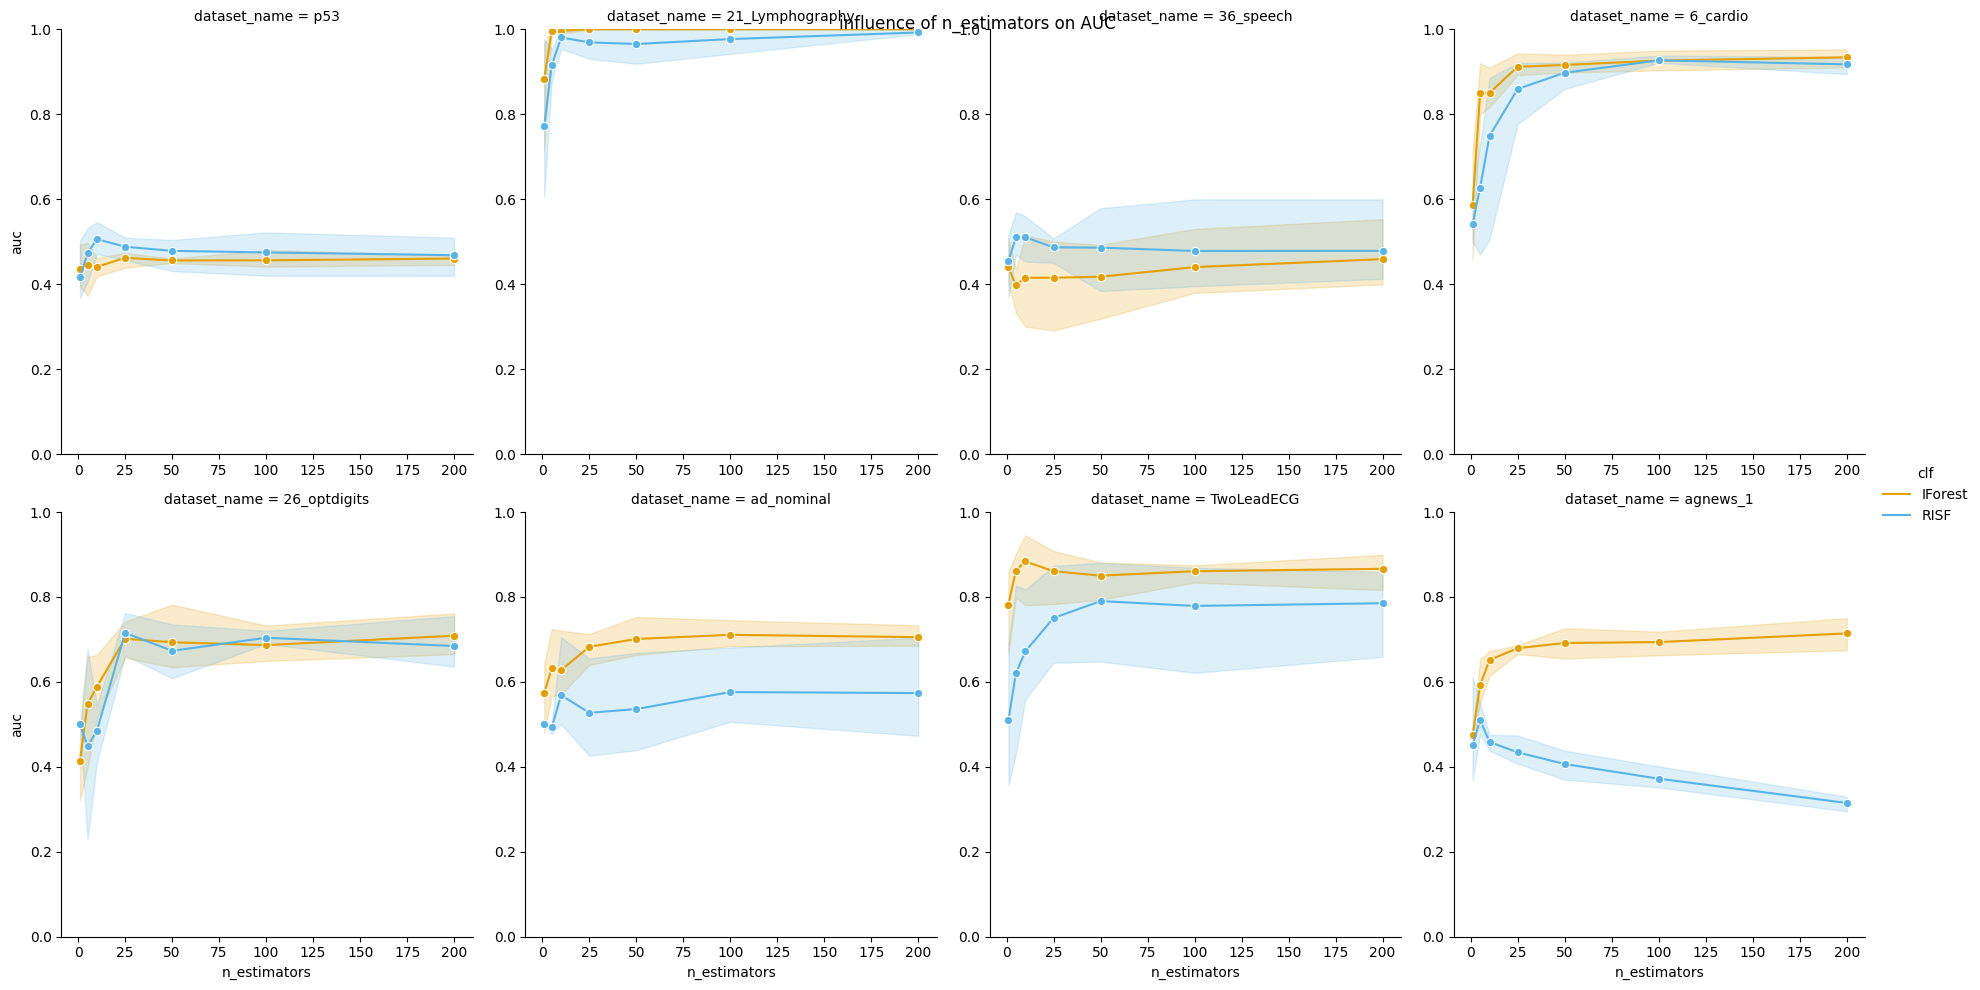

In [15]:
sensitivity_plot("../results/results_n_estimators.csv", "n_estimators")

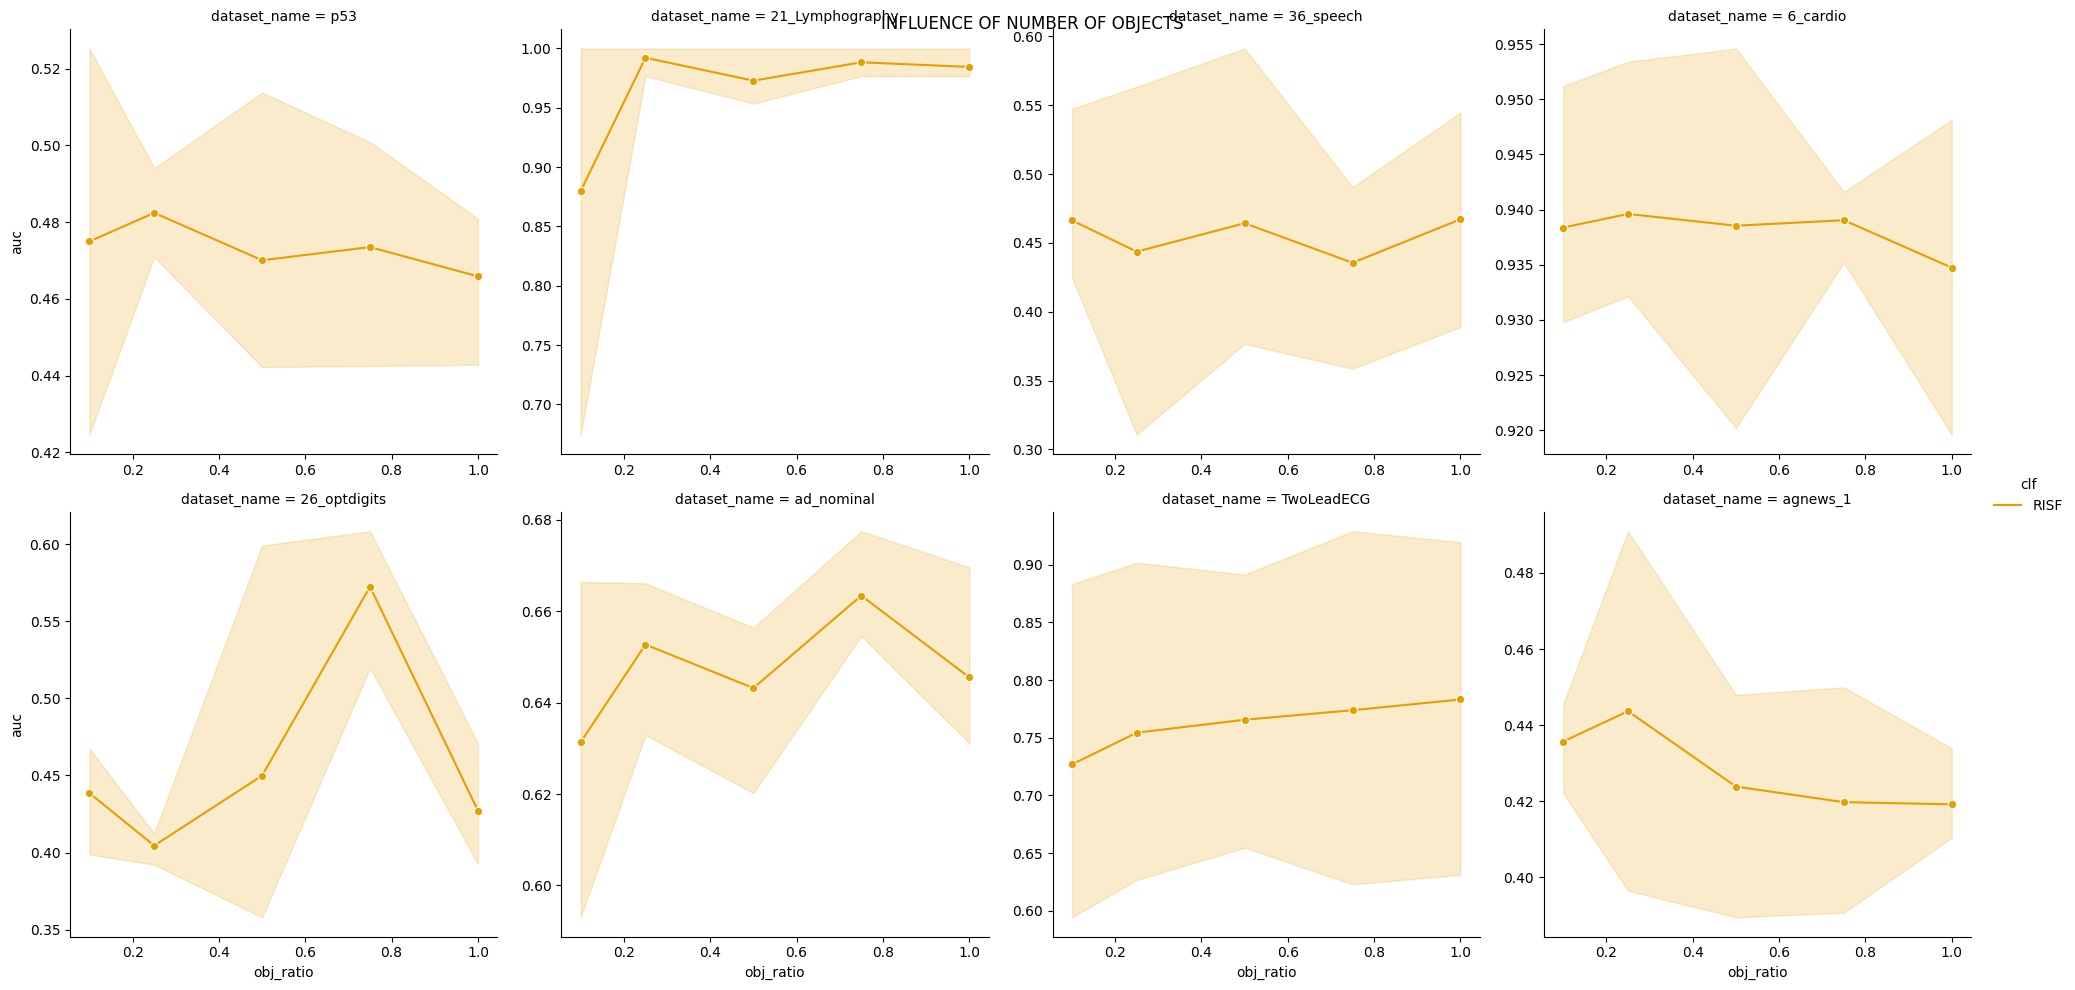

In [20]:
results_df = pd.read_csv("../results/results_selected_obj_Ratio.csv")
sns.set_palette(sns.color_palette(OKABE_ITO_SCALE))
g = sns.relplot(data=results_df, x="obj_ratio", y="auc", hue="clf", marker="o", col="dataset_name", col_wrap=4, 
            facet_kws={'sharey': False, 'sharex': False}, kind="line")

g.fig.suptitle('INFLUENCE OF NUMBER OF OBJECTS')
sns.despine()

c:\Users\sebas\mambaforge\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\sebas\mambaforge\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\sebas\mambaforge\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


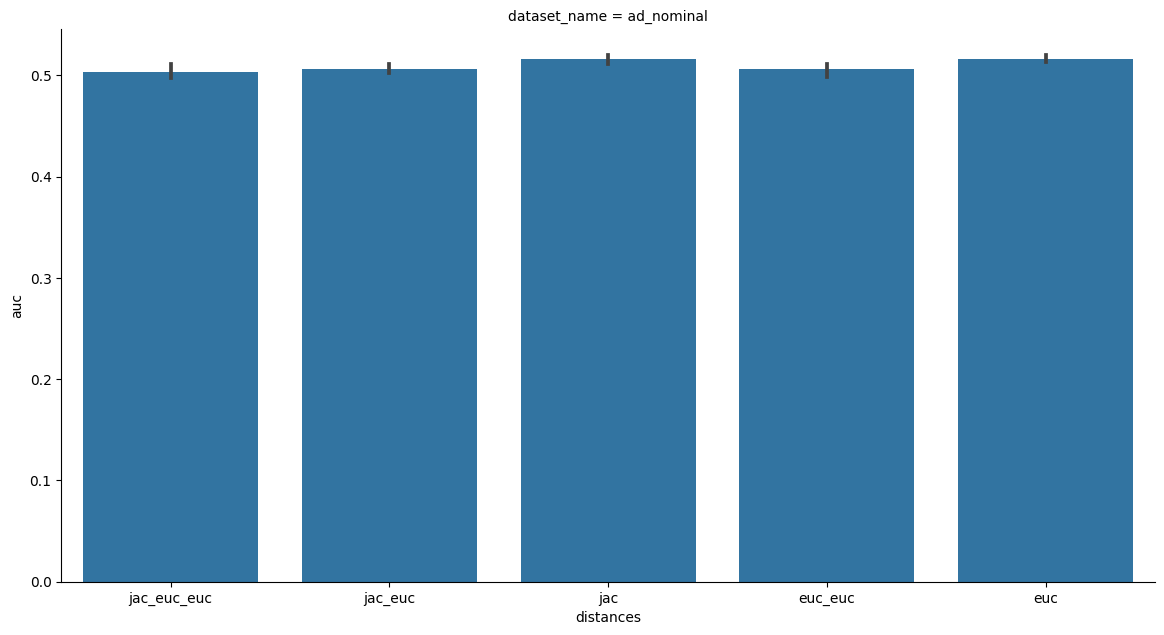

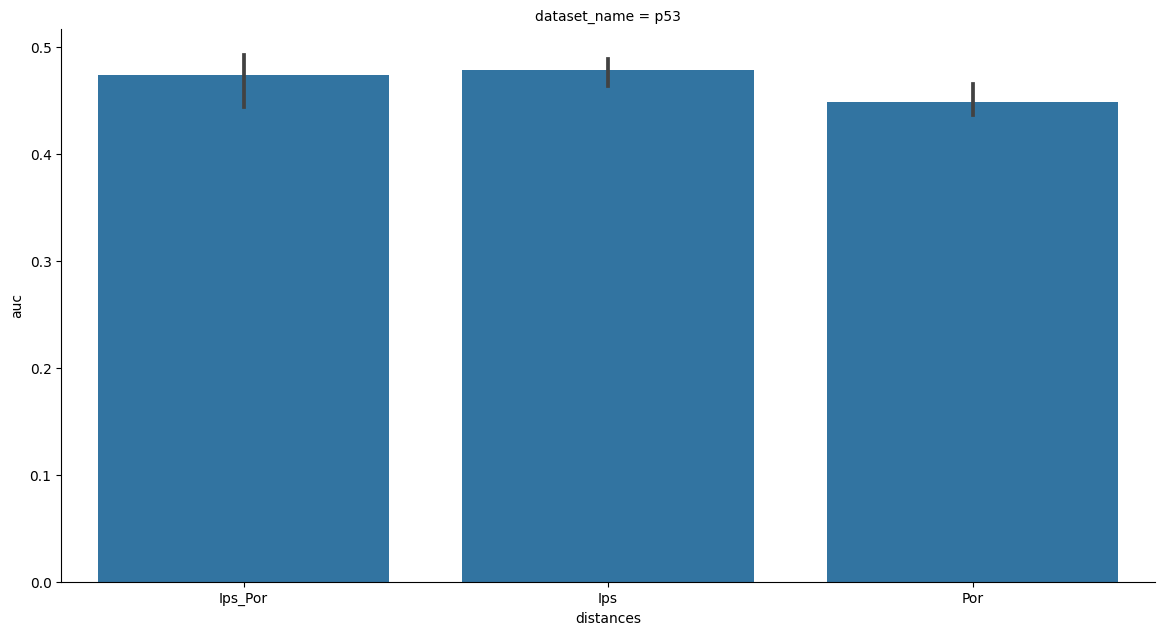

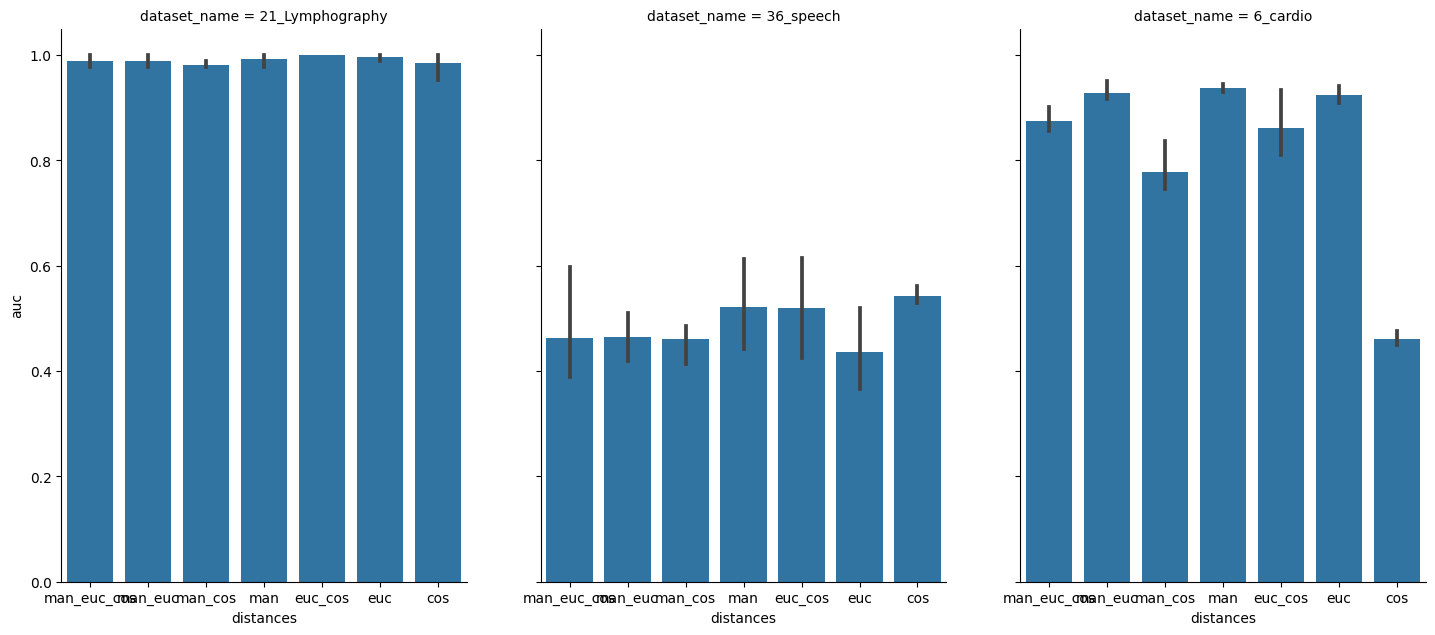

In [9]:
results_df = pd.read_csv("../results/results_selected_distances.csv")
for category in results_df.dataset_type.unique():
    g = sns.FacetGrid(results_df[results_df.dataset_type == category], col="dataset_name")
    g.map(sns.barplot,'distances', 'auc')
    plt.gcf().set_size_inches(15, 8)